# ТВиМС Задание 4

## Вариант 14

Проверка статистических гипотез.
Критерии согласия Пирсона, Колмогорова, Мизеса.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
a = 0
b = math.pi / 4

In [4]:
def get_x():
    return  + random.random()*(b-a)

def y_func(x):
    return math.tan(x)

def get_y():
    return y_func(get_x())

In [5]:
def generate_varseries(n):
    ys = []

    for i in range(n):
        ys.append(get_y())

    ys.sort()
    return ys

In [6]:
def Fy_deduced(y):
    if y < 0:
        return 0
    elif y > 1:
        return 1
    else:
        return 4 / math.pi * math.atan(y)

def fy_deduced(y):
    if y < 0 or y > 1:
        return 0
    else:
        return 4 / (math.pi * (1 + y**2))

***

In [7]:
# (copied from second_and_third.ipynb with slight modifications)
def histogram_data_beta(a, b, vs, group_num, normalize=True):
    """Return data needed for type 2 histogram
    as a list of tuples each being:
    (a bin's left bound, a bin's occurrences count)
    
    Each bin's interval has its left bound included
    and right excluded, e.g. [0, 1), [1, 2), [3, 4), ...

    Примечание: работает только для НСВ с почти-лишь-только-один-раз-встречающимися
    элементами вариационного ряда (здесь вар-ряд = выборка из-за *высокой степени
    уникальности* элементов выборки, т.е. элементы списка 'vs' могут повторяться,
    но это очень маловероятно, если число b-a неотрицательного порядка/
    однозначного отрицательного порядка - порядок условно от -9 до 10+)
    """
    bin_capacity = len(vs) // group_num + (1 if len(vs) % group_num != 0 else 0)

    hdata = [[a, 0]]
    for i in range(len(vs)):
        hdata[-1][1] += 1
        last_bin_empty = False

        # if the last bin is full:
        if hdata[-1][1] == bin_capacity:
            # calculate its right bound:
            if i == len(vs) - 1:
                right_bound = b
            else:
                right_bound = (vs[i] + vs[i+1]) / 2

            # add a new empty bin:
            hdata.append([right_bound, 0])
            last_bin_empty = True

    if last_bin_empty:
        del hdata[-1]

    if normalize:
        square = 0
        for i in range(len(hdata) - 1):
            # calculating local density and updating square:
            hdata[i][1] = hdata[i][1] / (hdata[i+1][0] - hdata[i][0])
            square += hdata[i][1] * (hdata[i+1][0] - hdata[i][0])
        
        hdata[-1][1] = hdata[-1][1] / (b - hdata[-1][0])
        square += hdata[-1][1] * (b - hdata[-1][0])

        for hd in hdata:
            hd[1] /= square
    else:
        for hd in hdata:
            hd[1] /= len(vs)

    hdata.append([b, hdata[-1][1]])
            
    return hdata

***

### Критерий согласия Пирсона

In [8]:
def xi_squared_criteria(a, b, n, group_num, f_hypothesis):
    vs = generate_varseries(n)
    hdata = histogram_data_beta(a, b, vs, group_num, normalize=False)

    hypothesis_ys = [Fy_deduced(hdata[i+1][0]) - Fy_deduced(hdata[i][0])
                     for i in range(group_num)]
    histogram_ys = [hd[1] for hd in hdata[:-1]]

    # checking this weird condition from bsuir docs:
    assert abs(1 - sum(hypothesis_ys)) <= 0.01

    summands = []
    for i in range(group_num):
        summand = ((histogram_ys[i] - hypothesis_ys[i])**2
                   / (hypothesis_ys[i]))
        summands.append(summand)

    xi_squared = n*sum(summands)
    return xi_squared

In [9]:
# test xi_squared 20 times

for i in range(20):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    print(xi)

9.401380955104456
12.764271955118248
15.558321783327447
18.697614246530897
12.214335548754544
10.78562978586968
11.673582497889022
11.526485015784175
7.882682114241943
20.448216208836154
15.760949638210947
11.032713595580038
16.85145807972843
23.275339550903347
16.505041254919618
12.753341537952073
4.866480815206834
15.463348282364201
8.937774805120469
7.9504026614367245


In [10]:
# xi-table data for k = 16:

xi_090 = 23.542
xi_095 = 26.296
xi_099 = 32.000

In [11]:
# how often empirical xi squared is less than xi squared 0.90?

sample_num = 10_000
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_090:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.90 in {answer*100}% of cases.')

# how often empirical xi squared is less than xi squared 0.95?
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_095:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.95 in {answer*100}% of cases.')

# how often empirical xi squared is less than xi squared 0.99?
answer = 0
for _ in range(sample_num):
    xi = xi_squared_criteria(0, 1, 200, 16, fy_deduced)
    if xi < xi_099:
        answer += 1

answer /= sample_num
print(f'Observed xi squared is less than xi squared 0.99 in {answer*100}% of cases.')

Observed xi squared is less than xi squared 0.90 in 89.77000000000001% of cases.
Observed xi squared is less than xi squared 0.95 in 94.62% of cases.
Observed xi squared is less than xi squared 0.99 in 98.28% of cases.


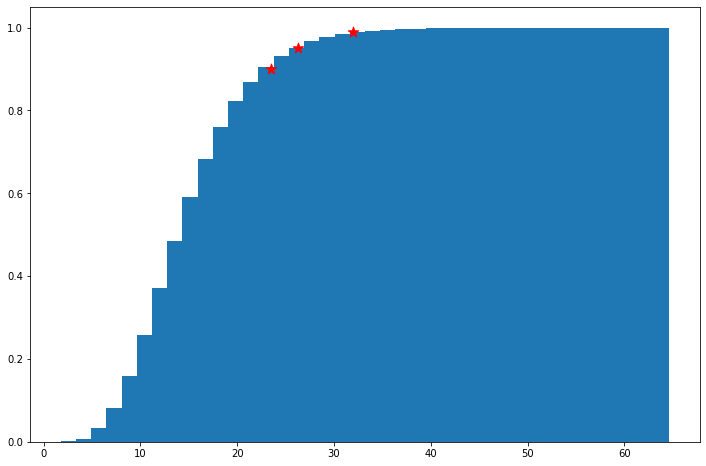

In [12]:
sample_num = 64_000

xis_vs = [xi_squared_criteria(0, 1, 200, 16, fy_deduced) for _ in range(sample_num)]
plt.hist(xis_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([xi_090, xi_095, xi_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Колмогорова

In [13]:
def max_deviation(a, b, vs, Fy_analytic):
    xs = np.linspace(a, b, 1000)
    yas = [Fy_analytic(x) for x in xs]

    yes = []
    current_i = 0
    for x in xs:
        while current_i < len(vs) and x > vs[current_i]:
            current_i += 1
        yes.append(current_i/len(vs))

    yes = np.array(yes)
    diffs = np.abs(yas - yes)
    
    return max(diffs)

In [14]:
def kolmogorov_lambda_criteria(a, b, n, Fy_analytic):
    vs = generate_varseries(n)
    md = max_deviation(a, b, vs, Fy_analytic)

    return math.sqrt(n)*md

In [15]:
# testing Kolmogorov criteria 20 times:

for _ in range(20):
    kc = kolmogorov_lambda_criteria(0, 1, 30, Fy_deduced)
    print(kc)

0.5457964481085797
0.46979040640723735
0.9059244225477111
0.6577828365529896
0.89298542792006
0.6850893064597771
0.5534333030261344
0.8662366966330581
1.0452965915328258
1.2649169706184966
0.7169380880434618
1.0419346287454099
0.5802963838040552
0.5094940644843292
1.0461816625252016
0.4434955109472563
0.8160444319180313
0.8656810781364833
1.068004952621063
0.7391659253609049


In [16]:
# Kolmogorov table data:

klambda_090 = 1.22
klambda_095 = 1.36
klambda_099 = 1.63

In [17]:
# how often empirical lambda is less than lambda 0.90?

sample_num = 10_000
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_090:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.90 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.95?
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_095:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.95 in {answer*100}% of cases.')

# how often empirical lambda is less than lambda 0.99?
answer = 0
for _ in range(sample_num):
    klambda = kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced)
    if klambda < klambda_099:
        answer += 1

answer /= sample_num
print(f'Observed lambda is less than lambda 0.99 in {answer*100}% of cases.')

Observed lambda is less than lambda 0.90 in 90.71000000000001% of cases.
Observed lambda is less than lambda 0.95 in 95.54% of cases.
Observed lambda is less than lambda 0.99 in 99.02% of cases.


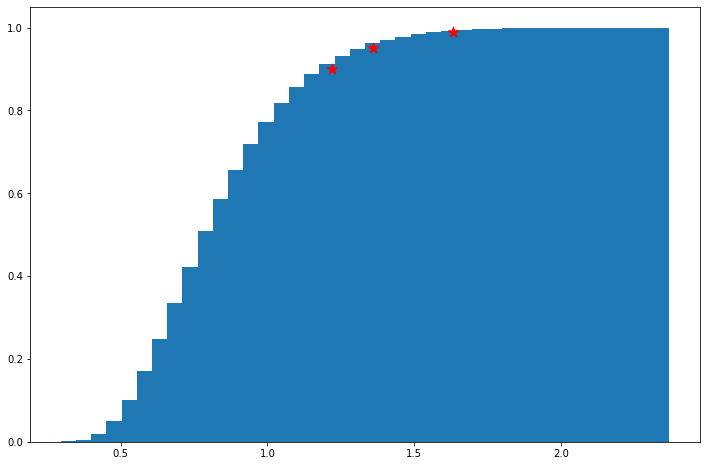

In [19]:
sample_num = 64_000

klambda_vs = [kolmogorov_lambda_criteria(0, 1, 200, Fy_deduced) for _ in range(sample_num)]
plt.hist(klambda_vs, bins=40, cumulative=True, density=True, zorder=-1)

plt.scatter([klambda_090, klambda_095, klambda_099], [0.90, 0.95, 0.99], color='red', marker='*', s=120)

plt.show()

***

### Критерий согласия Мизеса